--- Random Forest ---
Accuracy: 0.7000
              precision    recall  f1-score   support

           N       0.35      0.38      0.36        16
           Y       0.81      0.80      0.80        54

    accuracy                           0.70        70
   macro avg       0.58      0.59      0.58        70
weighted avg       0.71      0.70      0.70        70

--- Decision Tree ---
Accuracy: 0.6857
              precision    recall  f1-score   support

           N       0.38      0.56      0.45        16
           Y       0.85      0.72      0.78        54

    accuracy                           0.69        70
   macro avg       0.61      0.64      0.61        70
weighted avg       0.74      0.69      0.70        70

--- Logistic Regression ---
Accuracy: 0.6286
              precision    recall  f1-score   support

           N       0.33      0.62      0.43        16
           Y       0.85      0.63      0.72        54

    accuracy                           0.63        70
   ma

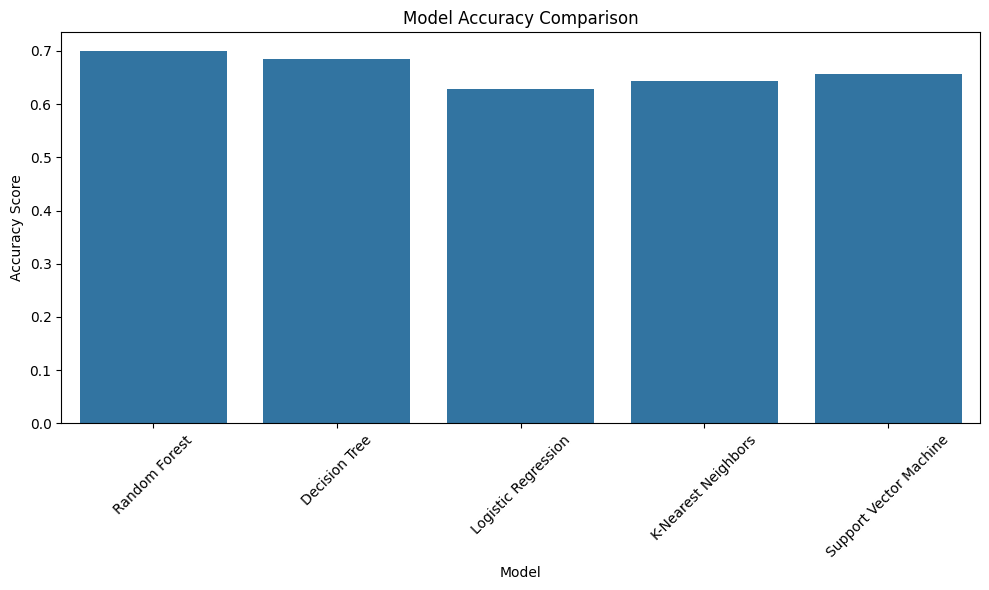

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
loan_train = pd.read_csv('data/loan-train.csv')

# Step 1: Clean the data
# Separate categorical and numerical columns
categorical_cols = loan_train.select_dtypes(include=['object']).columns
numerical_cols = loan_train.select_dtypes(exclude=['object']).columns

# Fill missing values: Categorical columns with mode, Numerical columns with mean
for col in categorical_cols:
    loan_train[col].fillna(loan_train[col].mode()[0], inplace=True)

for col in numerical_cols:
    loan_train[col].fillna(loan_train[col].mean(), inplace=True)

# Replace '3+' in Dependents with '3' and convert Dependents to numerical
loan_train['Dependents'] = loan_train['Dependents'].replace('3+', '3')

# One-hot encode categorical variables using pd.get_dummies
loan_train = pd.get_dummies(loan_train, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Step 2: Outlier Removal using IQR Method
Q1 = loan_train[numerical_cols].quantile(0.25)
Q3 = loan_train[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers based on IQR
loan_train = loan_train[~((loan_train[numerical_cols] < (Q1 - 1.5 * IQR)) | (loan_train[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 3: Normalize the numerical features
scaler = MinMaxScaler()
loan_train[numerical_cols] = scaler.fit_transform(loan_train[numerical_cols])

# Step 4: Prepare the data
X = loan_train.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_train['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42)
}

# Train models and evaluate their performance
model_accuracies = {}
for model_name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Step 6: Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


--- Random Forest ---
Accuracy: 0.7714
              precision    recall  f1-score   support

           N       0.50      0.06      0.11        16
           Y       0.78      0.98      0.87        54

    accuracy                           0.77        70
   macro avg       0.64      0.52      0.49        70
weighted avg       0.72      0.77      0.70        70

--- Decision Tree ---
Accuracy: 0.7286
              precision    recall  f1-score   support

           N       0.42      0.50      0.46        16
           Y       0.84      0.80      0.82        54

    accuracy                           0.73        70
   macro avg       0.63      0.65      0.64        70
weighted avg       0.75      0.73      0.74        70

--- Logistic Regression ---
Accuracy: 0.7714
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        16
           Y       0.77      1.00      0.87        54

    accuracy                           0.77        70
   ma

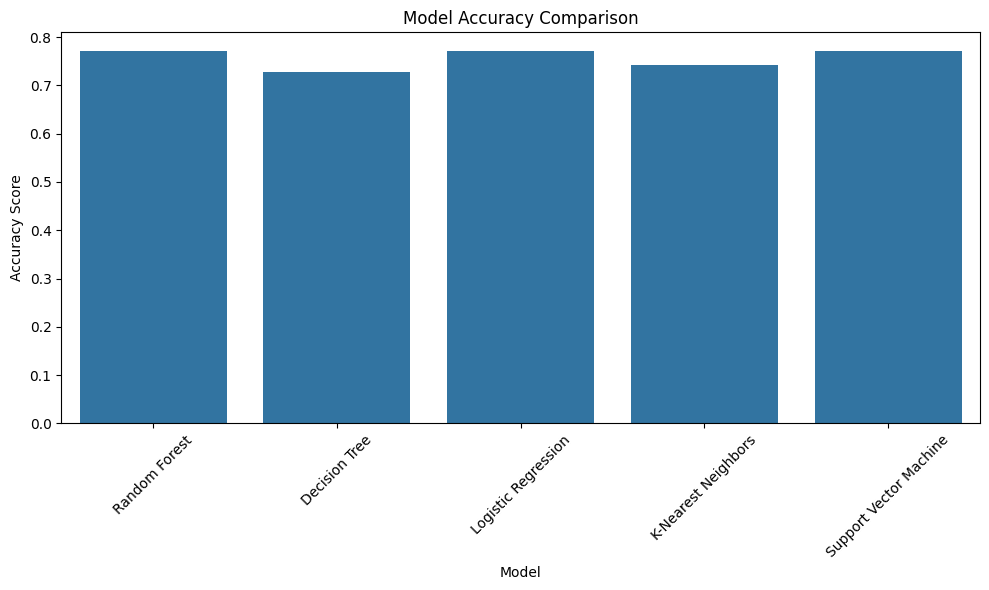

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
loan_train = pd.read_csv('data/loan-train.csv')

# Step 1: Clean the data
# Separate categorical and numerical columns
categorical_cols = loan_train.select_dtypes(include=['object']).columns
numerical_cols = loan_train.select_dtypes(exclude=['object']).columns

# Fill missing values: Categorical columns with mode, Numerical columns with mean
for col in categorical_cols:
    loan_train[col].fillna(loan_train[col].mode()[0], inplace=True)

for col in numerical_cols:
    loan_train[col].fillna(loan_train[col].mean(), inplace=True)

# Replace '3+' in Dependents with '3' and convert Dependents to numerical
loan_train['Dependents'] = loan_train['Dependents'].replace('3+', '3')

# One-hot encode categorical variables using pd.get_dummies
loan_train = pd.get_dummies(loan_train, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Step 2: Outlier Removal using IQR Method
Q1 = loan_train[numerical_cols].quantile(0.25)
Q3 = loan_train[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers based on IQR
loan_train = loan_train[~((loan_train[numerical_cols] < (Q1 - 1.5 * IQR)) | (loan_train[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 3: Normalize the numerical features
scaler = MinMaxScaler()
loan_train[numerical_cols] = scaler.fit_transform(loan_train[numerical_cols])

# Step 4: Prepare the data
X = loan_train.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_train['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42)
}

# Train models and evaluate their performance
model_accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Step 5: Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


--- Random Forest ---
Accuracy: 0.7714
              precision    recall  f1-score   support

           N       0.50      0.06      0.11        16
           Y       0.78      0.98      0.87        54

    accuracy                           0.77        70
   macro avg       0.64      0.52      0.49        70
weighted avg       0.72      0.77      0.70        70

--- Decision Tree ---
Accuracy: 0.7286
              precision    recall  f1-score   support

           N       0.42      0.50      0.46        16
           Y       0.84      0.80      0.82        54

    accuracy                           0.73        70
   macro avg       0.63      0.65      0.64        70
weighted avg       0.75      0.73      0.74        70

--- Logistic Regression ---
Accuracy: 0.7714
              precision    recall  f1-score   support

           N       0.00      0.00      0.00        16
           Y       0.77      1.00      0.87        54

    accuracy                           0.77        70
   ma

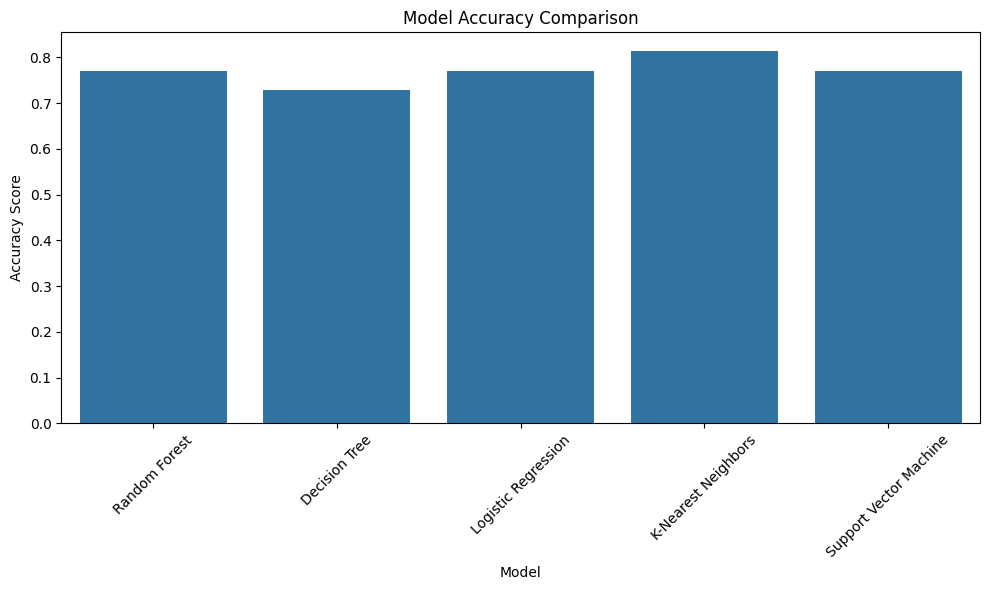

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
loan_train = pd.read_csv('data/loan-train.csv')

# Step 1: Clean the data
# Separate categorical and numerical columns
categorical_cols = loan_train.select_dtypes(include=['object']).columns
numerical_cols = loan_train.select_dtypes(exclude=['object']).columns

# Fill missing values: Categorical columns with mode, Numerical columns with mean
for col in categorical_cols:
    loan_train[col].fillna(loan_train[col].mode()[0], inplace=True)

for col in numerical_cols:
    loan_train[col].fillna(loan_train[col].mean(), inplace=True)

# Replace '3+' in Dependents with '3' and convert Dependents to numerical
loan_train['Dependents'] = loan_train['Dependents'].replace('3+', '3')

# One-hot encode categorical variables using pd.get_dummies
loan_train = pd.get_dummies(loan_train, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Step 2: Outlier Removal using IQR Method
Q1 = loan_train[numerical_cols].quantile(0.25)
Q3 = loan_train[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers based on IQR
loan_train = loan_train[~((loan_train[numerical_cols] < (Q1 - 1.5 * IQR)) | (loan_train[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 3: Prepare the data
X = loan_train.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_train['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42)
}

# Train models and evaluate their performance
model_accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Step 4: Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


--- Random Forest ---
Accuracy: 0.7724
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123

--- Decision Tree ---
Accuracy: 0.6829
              precision    recall  f1-score   support

           0       0.55      0.49      0.52        43
           1       0.74      0.79      0.76        80

    accuracy                           0.68       123
   macro avg       0.65      0.64      0.64       123
weighted avg       0.68      0.68      0.68       123

--- Logistic Regression ---
Accuracy: 0.7886
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   ma

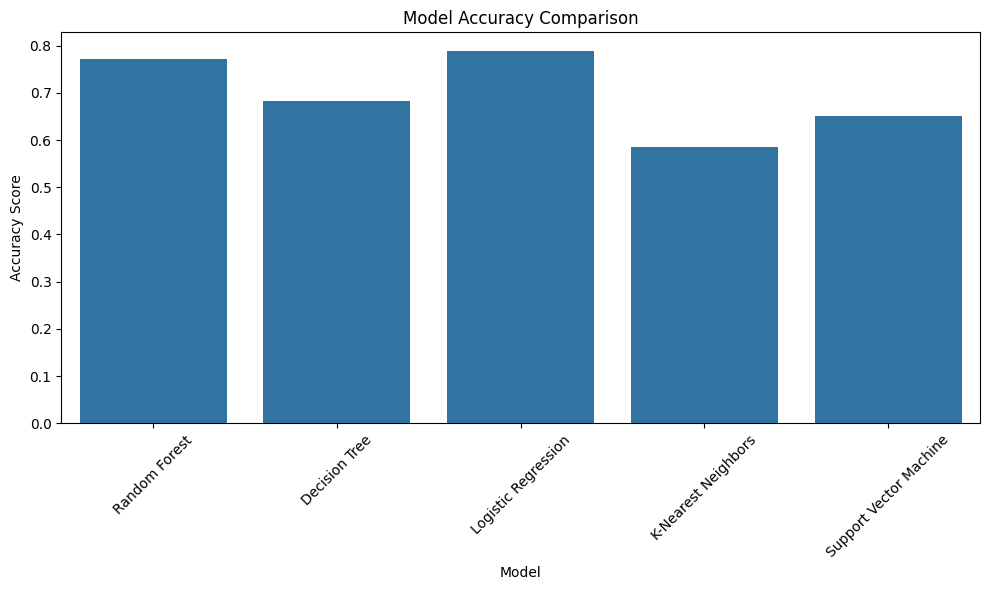

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
loan_train = pd.read_csv('data/loan-train.csv')

# Step 1: Clean the data
# Separate categorical and numerical columns
categorical_cols = loan_train.select_dtypes(include=['object']).columns
numerical_cols = loan_train.select_dtypes(exclude=['object']).columns

# Fill missing values: Categorical columns with mode, Numerical columns with mean
for col in categorical_cols:
    loan_train[col].fillna(loan_train[col].mode()[0], inplace=True)

for col in numerical_cols:
    loan_train[col].fillna(loan_train[col].mean(), inplace=True)

# Replace '3+' in Dependents with '3' and convert Dependents to numerical
loan_train['Dependents'] = loan_train['Dependents'].replace('3+', '3')

# One-hot encode categorical variables using pd.get_dummies
loan_train = pd.get_dummies(loan_train, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Encoding Loan_Status as it is the target variable
label_encoder = LabelEncoder()
loan_train['Loan_Status'] = label_encoder.fit_transform(loan_train['Loan_Status'])

# Step 2: Prepare the data
X = loan_train.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_train['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42)
}

# Train models and evaluate their performance
model_accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Step 3: Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
loan_train = pd.read_csv('data/loan-train.csv')

# Step 1: Clean the data
# Separate categorical and numerical columns
categorical_cols = loan_train.select_dtypes(include=['object']).columns
numerical_cols = loan_train.select_dtypes(exclude=['object']).columns

# Fill missing values: Categorical columns with mode, Numerical columns with mean
for col in categorical_cols:
    loan_train[col].fillna(loan_train[col].mode()[0], inplace=True)

for col in numerical_cols:
    loan_train[col].fillna(loan_train[col].mean(), inplace=True)

# Replace '3+' in Dependents with '3' and convert Dependents to numerical
loan_train['Dependents'] = loan_train['Dependents'].replace('3+', '3')

# One-hot encode categorical variables using pd.get_dummies
loan_train = pd.get_dummies(loan_train, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Step 2: Skewed Distribution Treatment (Square Root Transformation)
loan_train['ApplicantIncome'] = np.sqrt(loan_train['ApplicantIncome'])
loan_train['CoapplicantIncome'] = np.sqrt(loan_train['CoapplicantIncome'])
loan_train['LoanAmount'] = np.sqrt(loan_train['LoanAmount'])

# Step 3: Outlier Removal using IQR Method
Q1 = loan_train[numerical_cols].quantile(0.25)
Q3 = loan_train[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers based on IQR
loan_train = loan_train[~((loan_train[numerical_cols] < (Q1 - 1.5 * IQR)) | (loan_train[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 4: Normalize the numerical features
scaler = MinMaxScaler()
loan_train[numerical_cols] = scaler.fit_transform(loan_train[numerical_cols])

# Step 5: Prepare the data
X = loan_train.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_train['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train models and evaluate their performance using cross-validation
model_accuracies = {}
roc_auc_scores = {}
for model_name, model in models.items():
    model.fit(X_train_res, y_train_res)
    
    # Cross-validation for better model evaluation
    cv_scores = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='accuracy')
    cv_roc_auc = cross_val_score(model, X_train_res, y_train_res, cv=5, scoring='roc_auc')
    
    # Predictions on test set
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]  # For ROC-AUC score
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    model_accuracies[model_name] = accuracy
    roc_auc_scores[model_name] = roc_auc
    
    print(f"--- {model_name} ---")
    print(f"Cross-validated Accuracy: {np.mean(cv_scores):.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    print(classification_report(y_test, y_pred))

# Step 7: Visualize the results for Accuracy and ROC-AUC
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)

# Plot ROC-AUC
plt.subplot(1, 2, 2)
sns.barplot(x=list(roc_auc_scores.keys()), y=list(roc_auc_scores.values()))
plt.title('Model ROC-AUC Comparison')
plt.xlabel('Model')
plt.ylabel('ROC-AUC Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


--- Random Forest ---
Cross-validated Accuracy: 0.8187
Test Accuracy: 0.6389
ROC-AUC Score: 0.6337
              precision    recall  f1-score   support

           N       0.25      0.15      0.19        20
           Y       0.72      0.83      0.77        52

    accuracy                           0.64        72
   macro avg       0.48      0.49      0.48        72
weighted avg       0.59      0.64      0.61        72

--- Decision Tree ---
Cross-validated Accuracy: 0.7354
Test Accuracy: 0.7083
ROC-AUC Score: 0.6135
              precision    recall  f1-score   support

           N       0.47      0.40      0.43        20
           Y       0.78      0.83      0.80        52

    accuracy                           0.71        72
   macro avg       0.63      0.61      0.62        72
weighted avg       0.70      0.71      0.70        72

--- Logistic Regression ---
Cross-validated Accuracy: 0.6042
Test Accuracy: 0.5972
ROC-AUC Score: 0.6029
              precision    recall  f1-score

: 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('data/loan-train.csv')

# Step 5.1: Drop unnecessary variables (Loan_ID)
df = df.drop(['Loan_ID'], axis=1)

# Step 5.2: Data Imputation for Missing Values

# 5.2.1 Imputation for Categorical Variables (using mode)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

# 5.2.2 Imputation for Numerical Variables (using mean)
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

# Step 5.3: One-hot Encoding for Categorical Variables
df = pd.get_dummies(df)

# Drop specific encoded columns
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis=1)

# Rename columns for clarity
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}

df.rename(columns=new, inplace=True)

# Step 5.4: Remove Outliers Using IQR Method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Step 5.5: Skewed Distribution Treatment (Square Root Transformation)
df['ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])
df['LoanAmount'] = np.sqrt(df['LoanAmount'])

# Step 5.6: Separate Features (X) and Target (y)
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

# Step 5.7: Apply SMOTE to handle class imbalance
X, y = SMOTE(random_state=42).fit_resample(X, y)

# Step 5.8: Data Normalization (MinMax Scaling)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Step 5.9: Train Random Forest Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 5.10: Model Evaluation
y_pred = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print results
print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"Random Forest ROC-AUC: {roc_auc:.4f}")
print(classification_report(y_test, y_pred))

# Step 5.11: Visualize Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = df.drop(columns=['Loan_Status']).columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=[features[i] for i in indices])
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


Best Hyperparameters:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest Accuracy: 0.7886
Optimized Random Forest F1-score: 0.8587
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



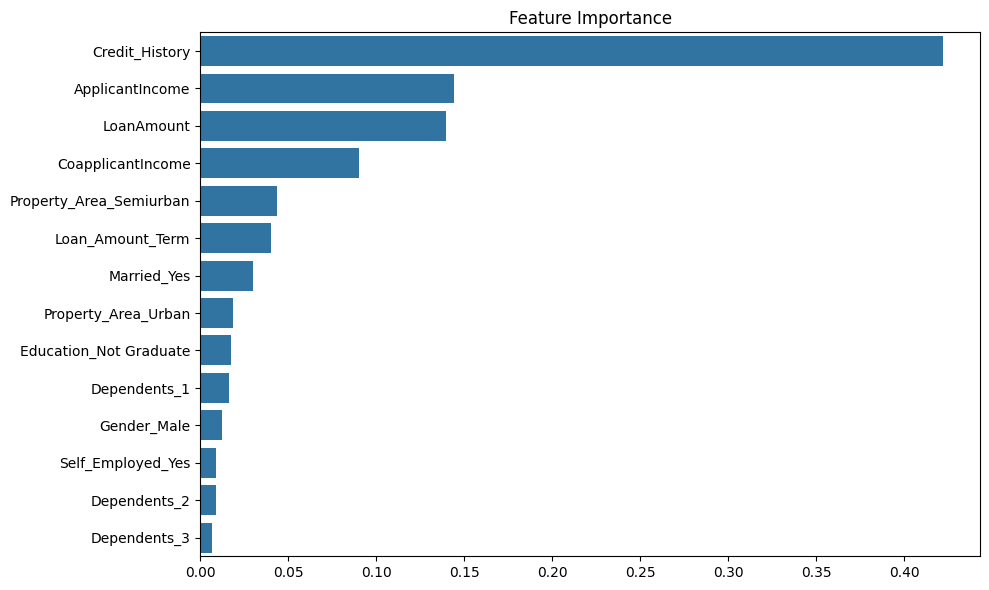

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
loan_train = pd.read_csv('data/loan-train.csv')

# Step 1: Clean the data
# Separate categorical and numerical columns
categorical_cols = loan_train.select_dtypes(include=['object']).columns
numerical_cols = loan_train.select_dtypes(exclude=['object']).columns

# Fill missing values: Categorical columns with mode, Numerical columns with mean
for col in categorical_cols:
    loan_train[col].fillna(loan_train[col].mode()[0], inplace=True)

for col in numerical_cols:
    loan_train[col].fillna(loan_train[col].mean(), inplace=True)

# Replace '3+' in Dependents with '3'
loan_train['Dependents'] = loan_train['Dependents'].replace('3+', '3')

# One-hot encode categorical variables using pd.get_dummies
loan_train = pd.get_dummies(loan_train, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Encoding Loan_Status as it is the target variable
loan_train['Loan_Status'] = loan_train['Loan_Status'].map({'Y': 1, 'N': 0})

# Step 2: Prepare the data
X = loan_train.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_train['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the hyperparameters grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Step 4: Use GridSearchCV for hyperparameter tuning (set n_jobs=1 to avoid multiprocessing issues)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=1, verbose=0)  # verbose=0 for minimum output
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

# Step 5: Evaluate the best model on the test set
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print accuracy and F1-score
print(f"Optimized Random Forest Accuracy: {accuracy:.4f}")
print(f"Optimized Random Forest F1-score: {f1:.4f}")

# Print classification report
print(classification_report(y_test, y_pred))

# Step 6: Visualize feature importance (Optional)
plt.figure(figsize=(10, 6))
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

sns.barplot(x=importances[indices], y=[features[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()
